## Third Movement: Exponential Defense with Geometric Attack Pattern

In [23]:
print("""This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports""")

This Cell is necessary or else my IDE will start running cells simultaneously which
      then leads to issues with unfinished imports


In [24]:
import os
import logging
import numpy as np
from datetime import datetime

## New Stuff

In [25]:
# Toggle to control execution mode
# True = standard calculation, False = includes 0 day exploit calculations (creates a separate file)
RUN_BASELINE_ONLY = False  

In [26]:
# Define experiment name as a variable for easy modification
experiment_name = "experiment_2"

In [27]:
# Set up main logger (original)
log_path = os.path.join(os.getcwd(), f'{experiment_name}.log')
if os.path.exists(log_path):
    os.remove(log_path)
logger = logging.getLogger()
handler = logging.FileHandler(log_path, mode='w')
handler.setFormatter(logging.Formatter('%(message)s'))
logger.addHandler(handler)
logger.setLevel(logging.INFO)
logger.info(f'[1] "{experiment_name}.log"')
logger.info(f'[1] "{datetime.now().strftime("%a %b %d %H:%M:%S %Y")}"')

# Set up subgraph logger if not RUN_BASELINE_ONLY:
if not RUN_BASELINE_ONLY:
    subgraph_log_path = os.path.join(os.getcwd(), f'sub_{experiment_name}.log')
    if os.path.exists(subgraph_log_path):
        os.remove(subgraph_log_path)
    subgraph_handler = logging.FileHandler(subgraph_log_path, mode='w')
    subgraph_handler.setFormatter(logging.Formatter('%(message)s'))
    # Don't add to logger yet

# Function to switch between loggers
def switch_logger(use_subgraph_logger=False):
    # Remove all handlers
    for hdlr in logger.handlers[:]:
        logger.removeHandler(hdlr)
        
    # Add appropriate handler
    if use_subgraph_logger:
        logger.addHandler(subgraph_handler)
        logger.info(f'[1] "sub_{experiment_name}.log"')
        logger.info(f'[1] "{datetime.now().strftime("%a %b %d %H:%M:%S %Y")}"')
    else:
        logger.addHandler(handler)

In [ ]:
# Global configuration
# This is the default weight value we will insert any time we we 
# need to insert a weight value for a trivial edge in the graph
# Why 0 ?  Because we have "hardness = exnp(-w)" so we get hardness = 1 for w = 0
# hardness = 1 means that edge is trivial to traverse
DEFAULT_WEIGHT_VALUE = 0  

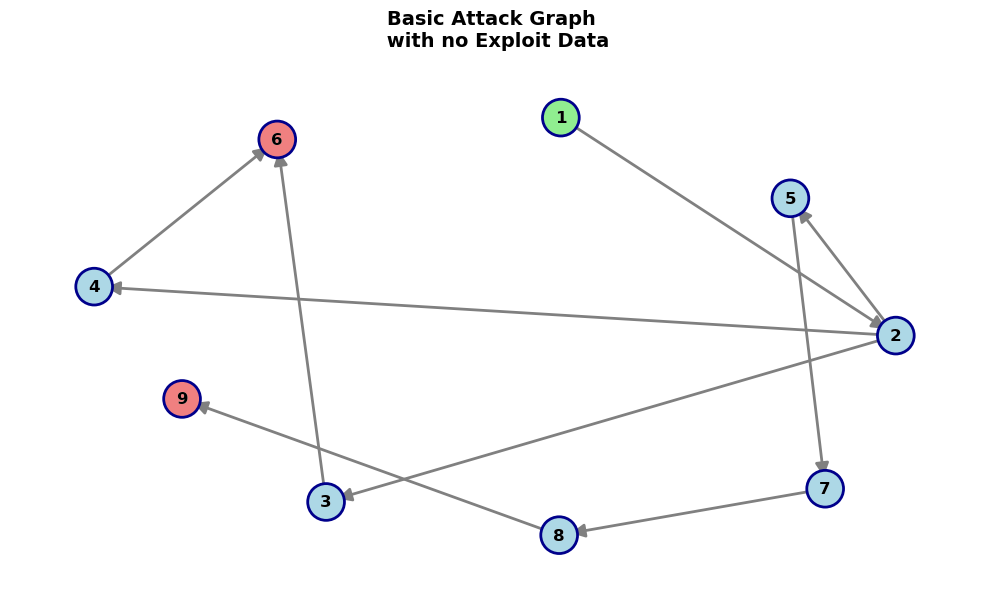

In [29]:
%run attack_graph_MARA.ipynb

### Create Subgraphs

++++++++++++++++++++++++++++++++++++++++
Start dropping & cleanup for the next subgraph here
Identified 2 target nodes: [6, 9]
Dropping 1 nodes: [7]
Original graph had 9 nodes, subgraph has 8 nodes
Original legitimate targets: [6, 9]
Remaining legitimate targets in subgraph: [6, 9]
Removing 1 unreachable nodes: {5}
++++++++++++++++++++++++++++++++++++++++
Start dropping & cleanup for the next subgraph here
Identified 2 target nodes: [6, 9]
Dropping 1 nodes: [2]
Original graph had 9 nodes, subgraph has 8 nodes
Original legitimate targets: [6, 9]
Remaining legitimate targets in subgraph: [6, 9]
Removing 1 unreachable nodes: {1}
++++++++++++++++++++++++++++++++++++++++
Start dropping & cleanup for the next subgraph here
Identified 2 target nodes: [6, 9]
Dropping 1 nodes: [3]
Original graph had 9 nodes, subgraph has 8 nodes
Original legitimate targets: [6, 9]
Remaining legitimate targets in subgraph: [6, 9]
Removing 0 unreachable nodes: set()
++++++++++++++++++++++++++++++++++++++++
Start 

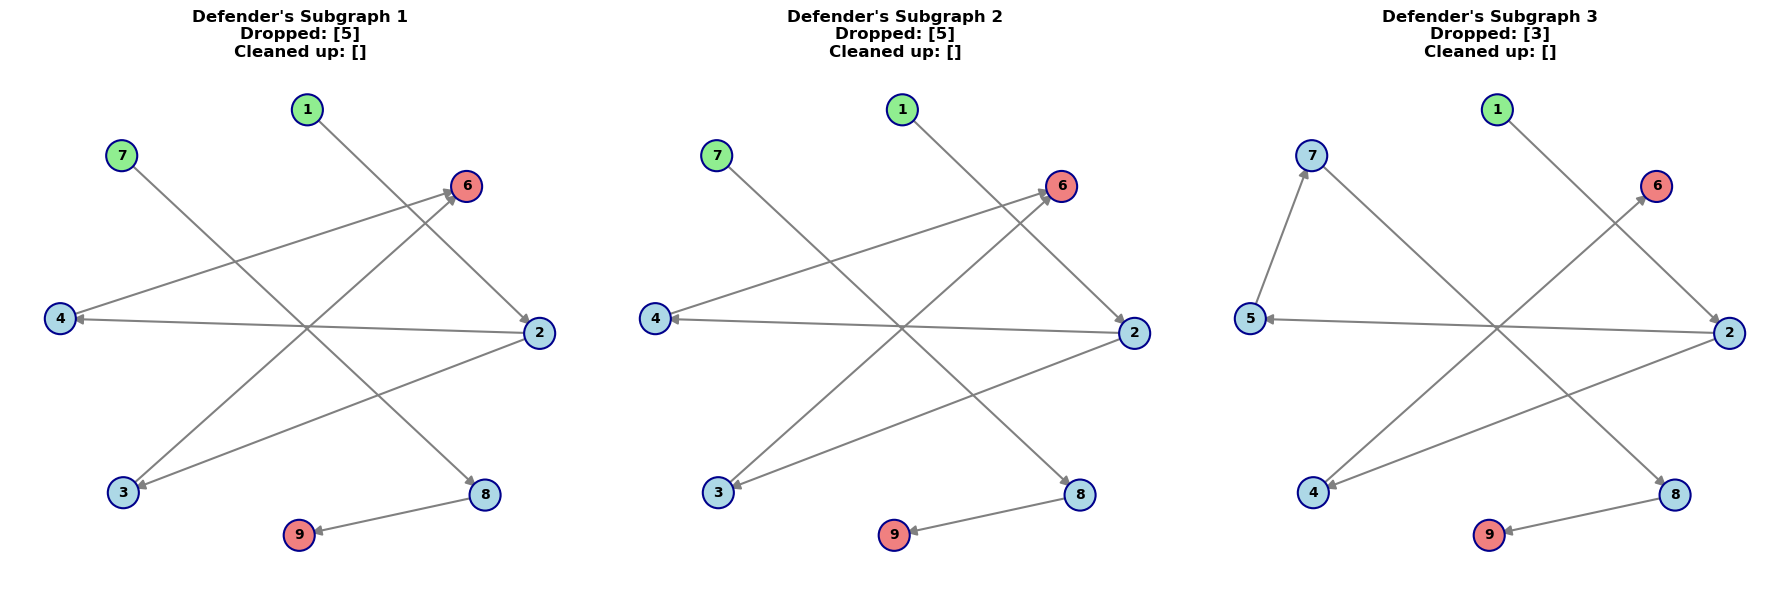

create subsgraph for defender concluded


In [30]:
%run create_subgraphs.ipynb

## Old Stuff

### Geometric Distribution Explanations

#### Base Formula

The geometric distribution gives the probability of the first success occurring on the $k$-th trial in a series of independent Bernoulli trials. Its probability mass function is:

\begin{equation}
P(X=x) = p \cdot (1-p)^{x-1}
\end{equation}

Where $p$ is the probability of success on each trial and $x$ is a positive integer.

#### Definition of "p" in our Specific Case

In my code, $p$ is defined as:

\begin{equation}
p = \frac{\mathrm{defens erate}}{\mathrm{attack rate}+\mathrm{defense rate}}
\end{equation}

which directly corresponds to formula (12) in the paper, where they define $p = \frac{\lambda_D}{\lambda_D + \lambda}$, with $\lambda_D$ being the defender's rate and $\lambda$ being the attacker's rate.

### Basic Explanation

Geometric distribution models attacker behavior when defender checks randomly:
- High defense_rate -> attacker plays it safe, prefers fewer steps (steep dropoff)
- Low defense_rate -> attacker risks more steps (gradual decline)
- Key insight: probability p = defense_rate/(attack_rate + defense_rate) controls how 
  "risky" each additional step becomes

This fits our intuition: if attacker doesn't know WHEN checks happen (only how often),
they become more cautious - especially when defender checks frequently

<img src="images/GeometricDistr_DefenseRates.png" width="50%">

In [31]:
attack_rate_list = [3]  
defense_rate_list = [3]

def random_steps(route, attack_rate=None, defense_rate=None, graph=None):
    """Geometric distribution for randomly moving defender"""
    # What is the prob that defender checks before attacker can make the next move?
    p = defense_rate / (attack_rate + defense_rate)
    x = np.arange(len(route))
    pmf = p * np.power(1-p, x)
    pmf = pmf / pmf.sum()
    return pmf

In [32]:
# %run ctr-core_simple.ipynb
%run exp_ctr-core.ipynb
main()

We start with the baseline graph calculation!

This is the Attacker Graph:
Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Total list of Edges with their weights:
1 -> 2 : 0
2 -> 3 : 0
2 -> 4 : 0
2 -> 5 : 0
3 -> 6 : 0
4 -> 6 : 0
5 -> 7 : 0
7 -> 8 : 0
8 -> 9 : 0

After merging targets of attack graph:
Nodes: [1, 2, 3, 4, 5, 7, 8, 'c(6,9)']
Total list of Edges with their weights:
1 -> 2 (key=0) : 0
2 -> 3 (key=0) : 0
2 -> 4 (key=0) : 0
2 -> 5 (key=0) : 0
3 -> c(6,9) (key=0) : 0
4 -> c(6,9) (key=0) : 0
5 -> 7 (key=0) : 0
7 -> 8 (key=0) : 0
8 -> c(6,9) (key=0) : 0

This is the Defender Graph:
Nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Total list of Edges with their weights:
1 -> 2 : 0
2 -> 3 : 0
2 -> 4 : 0
2 -> 5 : 0
3 -> 6 : 0
4 -> 6 : 0
5 -> 7 : 0
7 -> 8 : 0
8 -> 9 : 0

After merging targets of the Defender Graph:
Nodes: [1, 2, 3, 4, 5, 7, 8, 'c(6,9)']
Total list of Edges with their weights:
1 -> 2 (key=0) : 0
2 -> 3 (key=0) : 0
2 -> 4 (key=0) : 0
2 -> 5 (key=0) : 0
3 -> c(6,9) (key=0) : 0
4 -> c(6,9) (key=0

In [33]:
with open(experiment_name+'.log', 'r') as f:
    print(f.read())

[1] "experiment_2.log"
[1] "Sun Mar 09 14:22:23 2025"



BASELINE RUN: BOTH ATTACKER AND DEFENDER HAVE FULL GRAPH KNOWLEDGE



++++++++++++++++++++++++++++++++

The virtual target nodeID is c(6,9)

attack rate =  3 , defense rate =  3 

	equilibrium for multiobjective security game (MOSG)

optimal defense strategy:
         prob.
2 0.000000e+00
3 2.927842e-01
4 2.927842e-01
5 0.000000e+00
7 0.000000e+00
8 4.144315e-01

worst case attack strategies per goal:
          1
1 0.3536079
2 0.3536079
3 0.2927842
[1] 0.056

Defender can keep attacker success below: 0.056
Attacker can guarantee success probability of: 0.056

